**UCS2612 Machine Learning Laboratory**


**Assignment 9: Applications of dimensionality reduction techniques**


**Name: B Ayshwarya**


**Reg. No.: 3122 21 5001 017**

**CSE-A SEMESTER 6**


# **Importing libraries**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# **Step 1: Loading the dataset**

In [32]:
from google.colab import drive
drive.mount('/content/drive')

# Update file paths
red_wine_path = '/content/winequality-red.csv'
white_wine_path = '/content/winequality-white.csv'
# Load the dataset
df_red = pd.read_csv(red_wine_path, delimiter=";")
df_white = pd.read_csv(white_wine_path, delimiter=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Step 2: Preprocessing the data & feature engineering techniques**

In [48]:
# Add a class label column
df_red['class'] = 'red'
df_white['class'] = 'white'

# Combine the datasets
df = pd.concat([df_red, df_white])

#no missing values

# Encode the target variable 'class'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['class'])

# Feature engineering: Create a new feature representing the ratio of total sulfur dioxide to free sulfur dioxide
df['sulfur_ratio'] = df['total sulfur dioxide'] / df['free sulfur dioxide']

# Split features and labels
X = df.drop(columns=['class'])
y = df['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalization
# Perform normalization in addition to standardization
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X_scaled)

In [58]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class_encoded
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
 13  class_encoded         6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 761.4+ KB


# **Step 3: Exploratory data analysis**

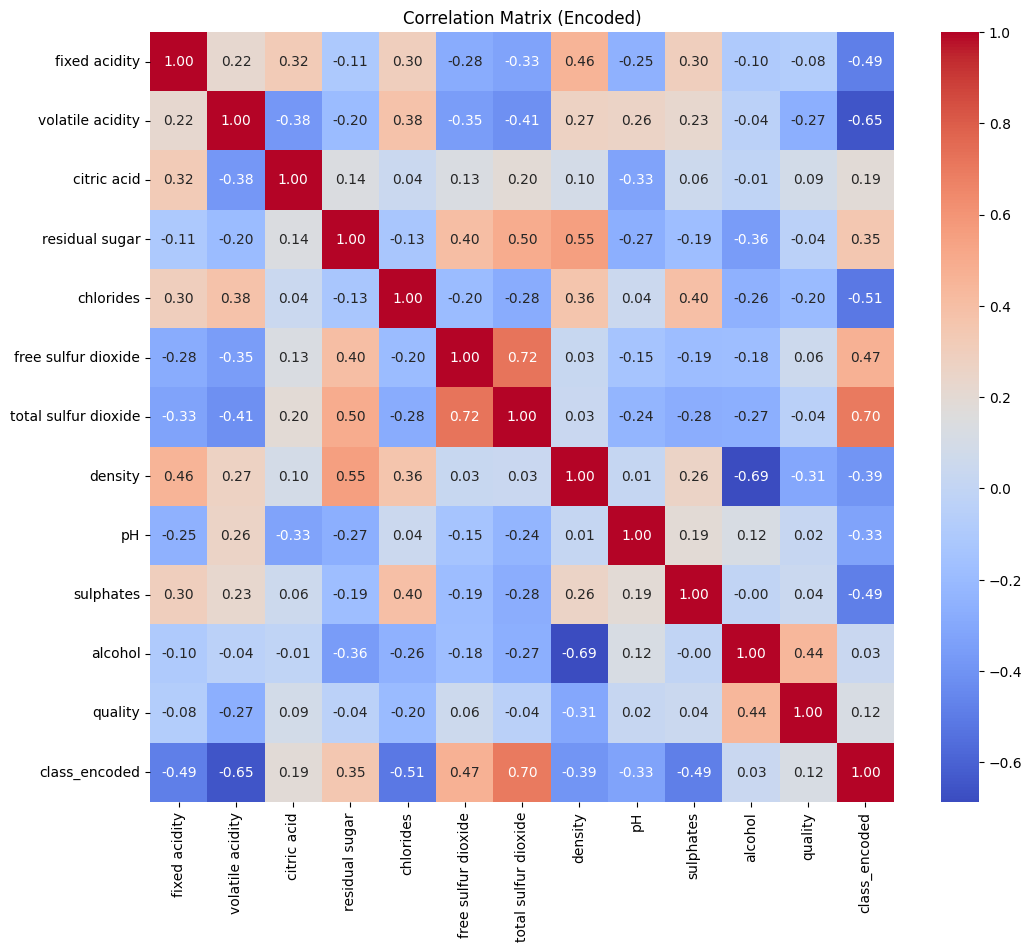

In [60]:
# Plot correlation matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encode the 'class' column to numerical values
label_encoder = LabelEncoder()
df['class_encoded'] = label_encoder.fit_transform(df['class'])

# Exclude non-numeric columns before computing correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix_encoded = df[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Encoded)')
plt.show()


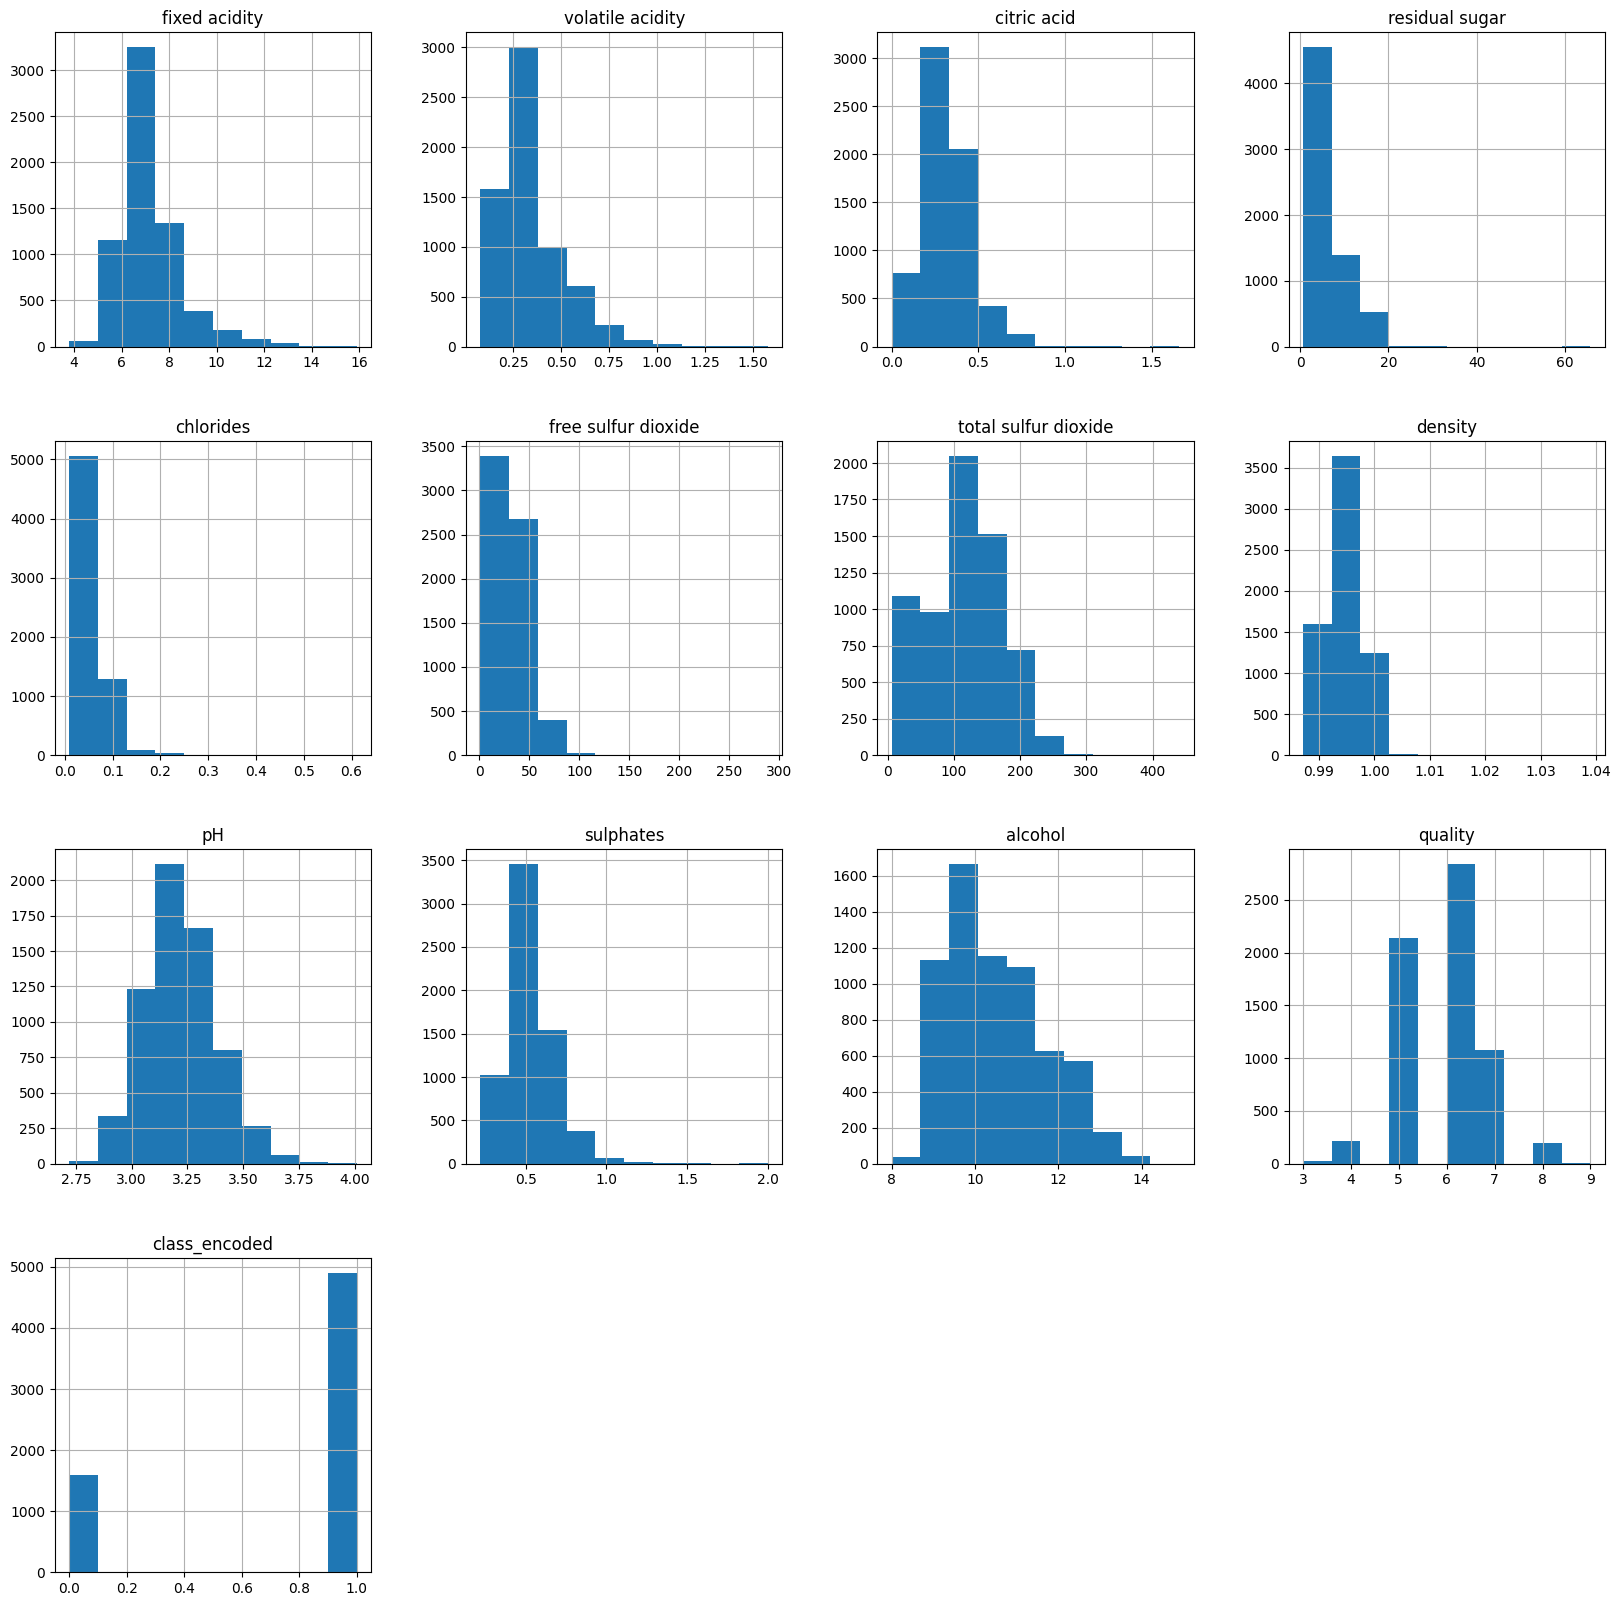

In [63]:
# Visualize feature distributions
df.hist(figsize=(20, 20))
plt.show()

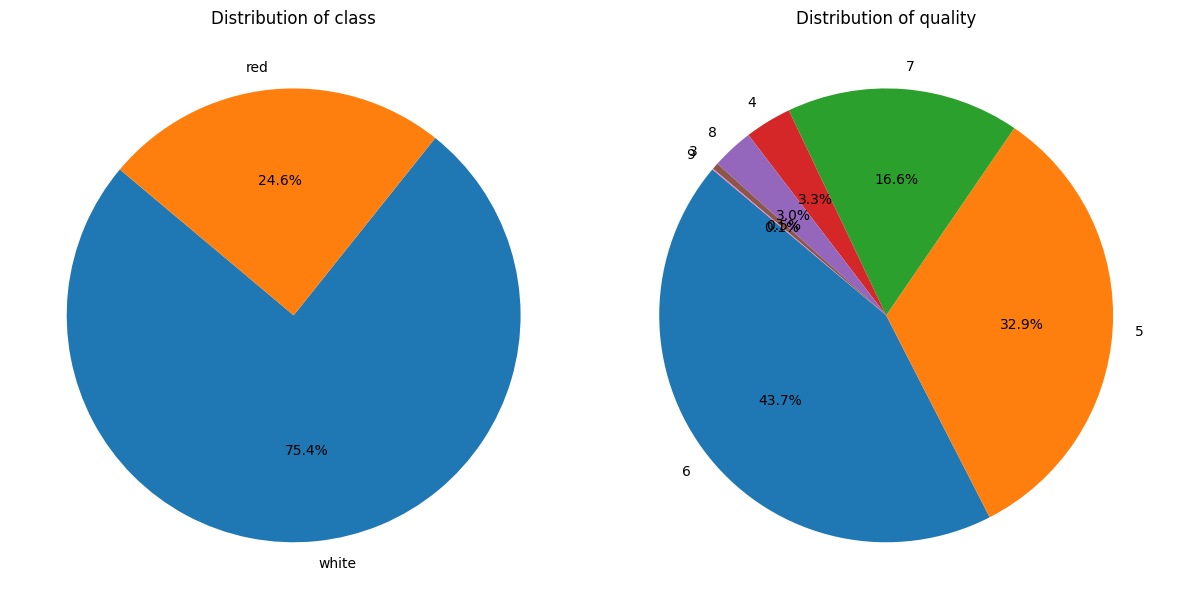

In [64]:
# Select features for pie chart
selected_features = ['class', 'quality']
# Plot pie charts for selected features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(selected_features, start=1):
    plt.subplot(1, 2, i)
    feature_counts = df[feature].value_counts()
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# **Step 4: Applying dimensionality reduction techniques on the dataset and obtain the reduced feature set.**

(Applying LDA & PCA dimensionality reduction techniques)

In [50]:
# Apply PCA to normalized data
pca_normalized = PCA(n_components=2)
X_pca_normalized = pca_normalized.fit_transform(X_normalized)

# Apply LDA to normalized data
lda_normalized = LDA(n_components=1)
X_lda_normalized = lda_normalized.fit_transform(X_normalized, y)

# **Step 5: Split data into training and testing sets**

In [51]:
# Split the normalized data into training and testing sets
X_train_pca_norm, X_test_pca_norm, y_train_pca_norm, y_test_pca_norm = train_test_split(X_pca_normalized, y, test_size=0.3, random_state=42)
X_train_lda_norm, X_test_lda_norm, y_train_lda_norm, y_test_lda_norm = train_test_split(X_lda_normalized, y, test_size=0.3, random_state=42)

# **Step 6: Training and testing the model using logistic regression**

In [52]:
# Logistic Regression with PCA features on normalized data
logreg_pca_norm = LogisticRegression(max_iter=1000)
logreg_pca_norm.fit(X_train_pca_norm, y_train_pca_norm)
logreg_pca_norm_predictions = logreg_pca_norm.predict(X_test_pca_norm)
logreg_pca_norm_accuracy = accuracy_score(y_test_pca_norm, logreg_pca_norm_predictions)

# Logistic Regression with LDA features on normalized data
logreg_lda_norm = LogisticRegression(max_iter=1000)
logreg_lda_norm.fit(X_train_lda_norm, y_train_lda_norm)
logreg_lda_norm_predictions = logreg_lda_norm.predict(X_test_lda_norm)
logreg_lda_norm_accuracy = accuracy_score(y_test_lda_norm, logreg_lda_norm_predictions)

# **Step 7: Measure the performance of the trained model**

In [54]:
# Predict and print accuracy for PCA
print("Logistic Regression Accuracy with PCA features on normalized data:", logreg_pca_norm_accuracy)

# Predict and print accuracy for LDA
print("Logistic Regression Accuracy with LDA features on normalized data:", logreg_lda_norm_accuracy)


Logistic Regression Accuracy with PCA features on normalized data: 0.9764102564102564
Logistic Regression Accuracy with LDA features on normalized data: 0.9917948717948718


# **Step 8: Visualising the confusion matrix**

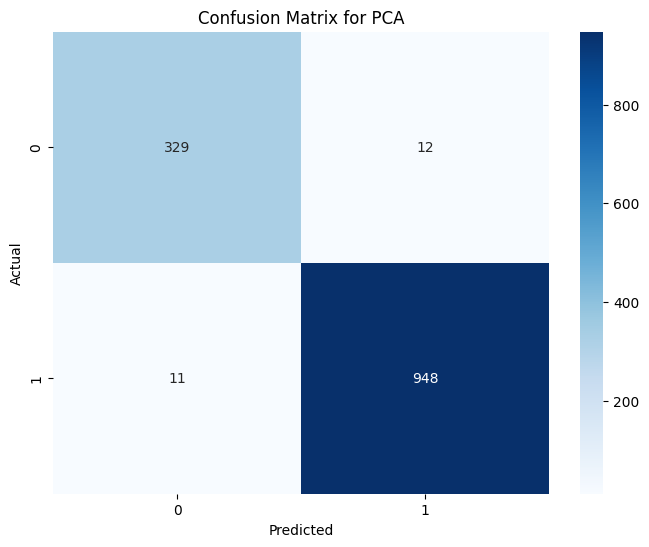

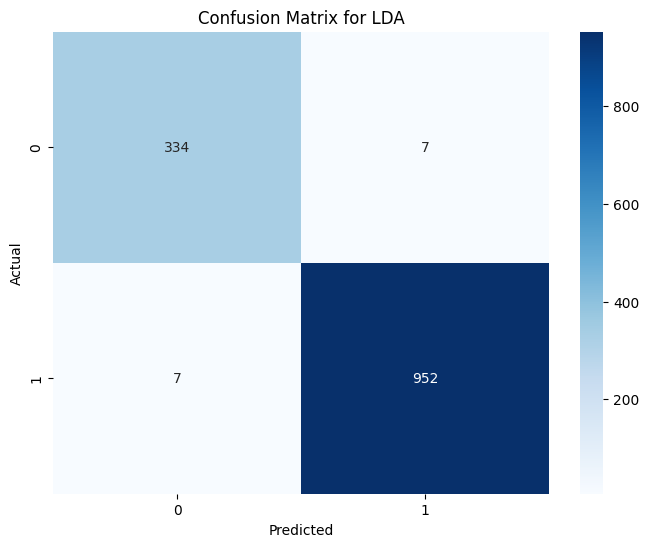

In [53]:
# Visualize confusion matrix for PCA
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for PCA')
plt.show()

# Visualize confusion matrix for LDA
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LDA')
plt.show()



# **Step 9: Visualize LDA and PCA models with different color maps for both training and testing sets**

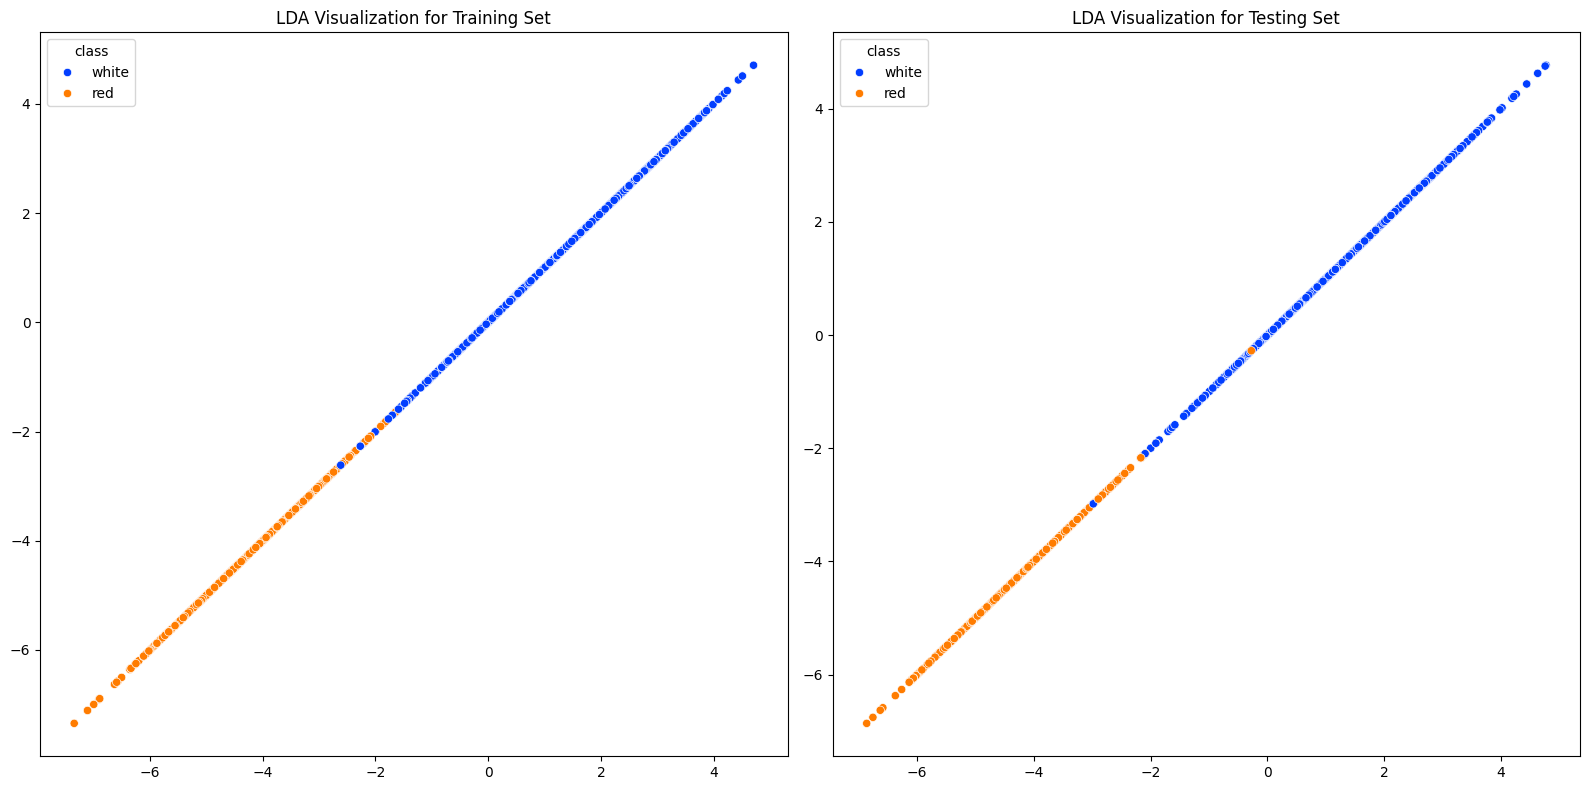

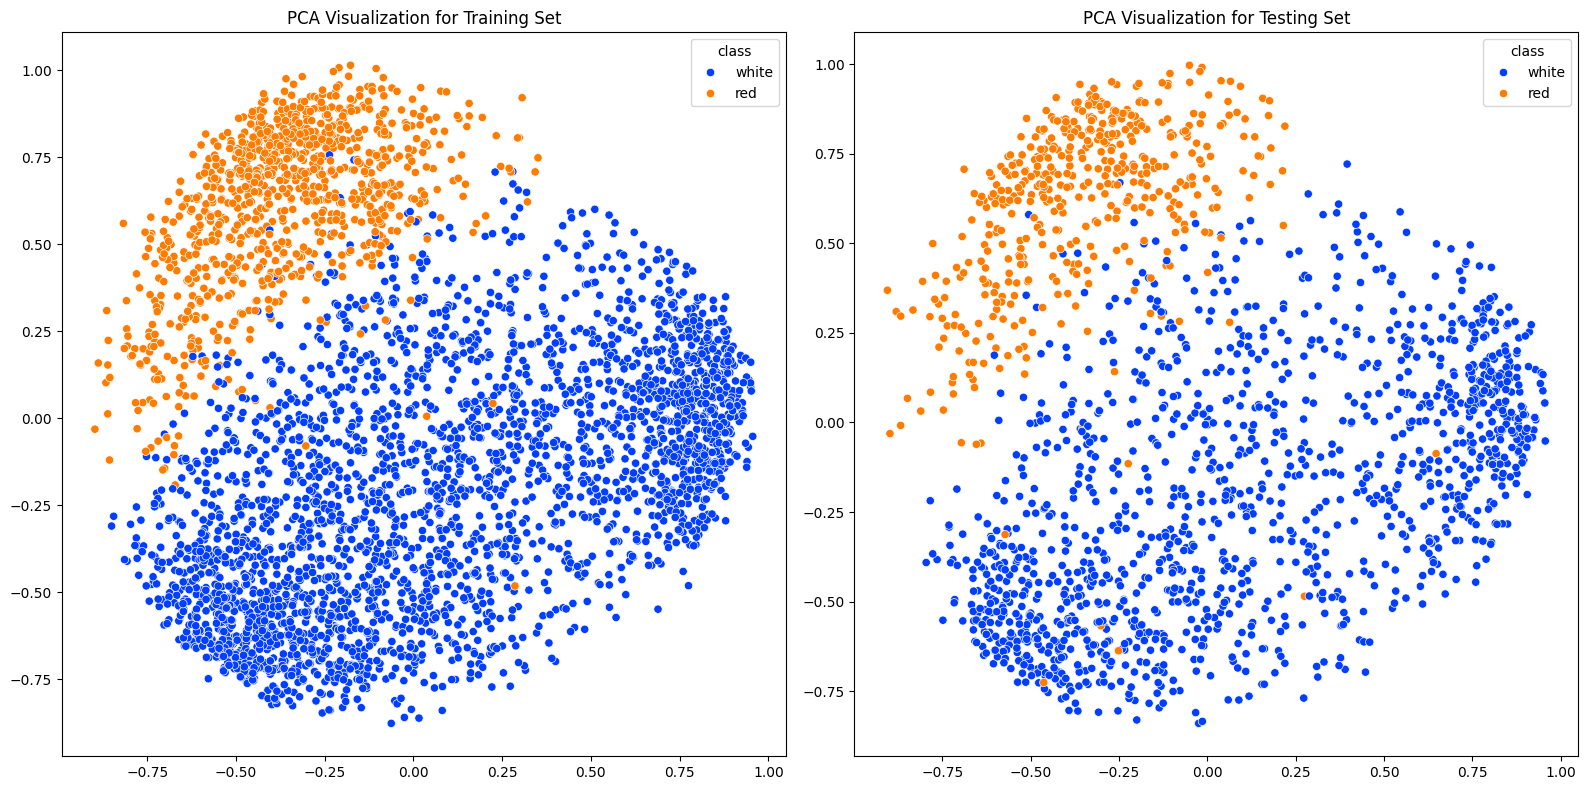

In [68]:
# Visualize LDA and PCA models with different color maps for both training and testing sets
plt.figure(figsize=(16, 8))

# Plot LDA for training set
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_lda_norm[:, 0], y=X_train_lda_norm[:, 0], hue=y_train_lda_norm, palette='bright')
plt.title('LDA Visualization for Training Set')

# Plot LDA for testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_lda_norm[:, 0], y=X_test_lda_norm[:, 0], hue=y_test_lda_norm, palette='bright')
plt.title('LDA Visualization for Testing Set')

plt.tight_layout()
plt.show()

# Visualize PCA for training set
plt.figure(figsize=(16, 8))

# Plot PCA for training set
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_pca_norm[:, 0], y=X_train_pca_norm[:, 1], hue=y_train_pca_norm, palette='bright')
plt.title('PCA Visualization for Training Set')

# Plot PCA for testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_pca_norm[:, 0], y=X_test_pca_norm[:, 1], hue=y_test_pca_norm, palette='bright')
plt.title('PCA Visualization for Testing Set')

plt.tight_layout()
plt.show()


# **Step 10: Accuracy comparison**

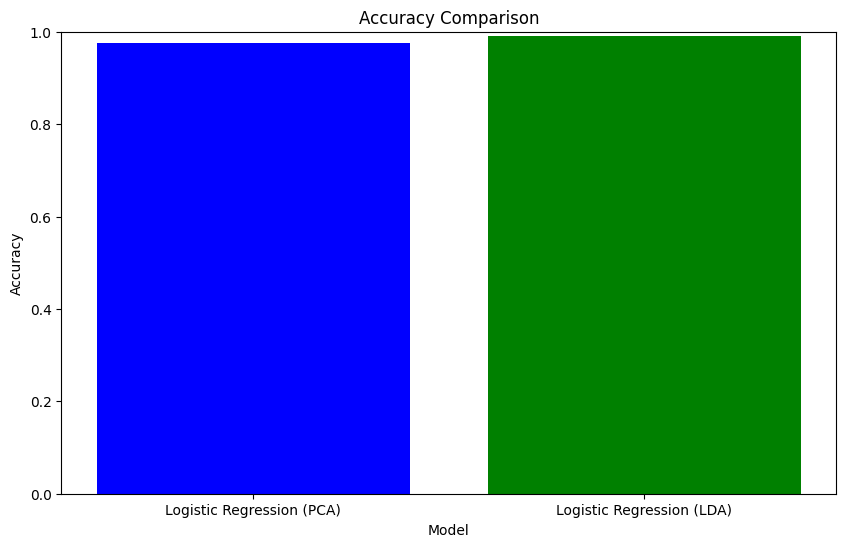

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define model names
model_names = ['Logistic Regression (PCA)', 'Logistic Regression (LDA)']

# Define accuracy scores
accuracy_scores = [logreg_pca_norm_accuracy, logreg_lda_norm_accuracy]

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
colors = ['blue', 'green']
plt.bar(model_names, accuracy_scores, color=colors)
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better visualization
plt.show()

# Define model predictions and true labels for ROC curves
model_predictions = [logreg_pca_norm_predictions, logreg_lda_norm_predictions]
true_labels = [y_test_pca_norm, y_test_lda_norm]

from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'class' to binary labels
label_encoder = LabelEncoder()
y_test_pca_norm_encoded = label_encoder.fit_transform(y_test_pca_norm)
y_test_lda_norm_encoded = label_encoder.transform(y_test_lda_norm)


# **Step 11: Plotting ROC curves for the result**

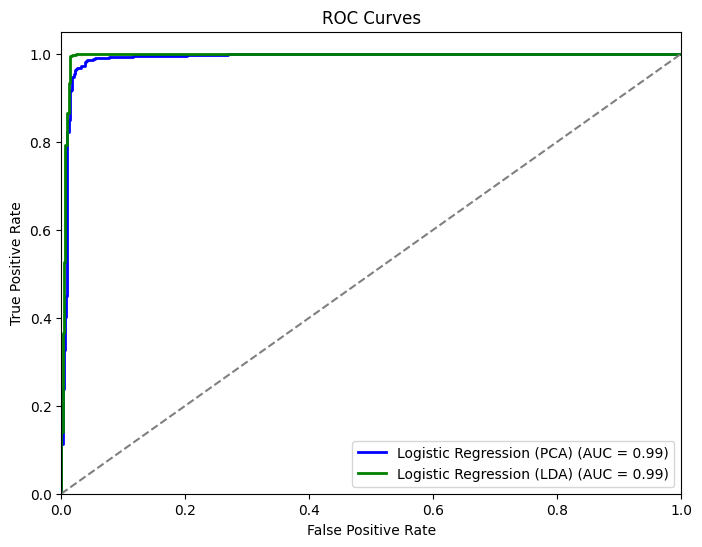

In [57]:
# Predict probabilities for positive class
model_probs = [logreg_pca_norm.predict_proba(X_test_pca_norm)[:, 1], logreg_lda_norm.predict_proba(X_test_lda_norm)[:, 1]]

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(model_names)):
    fpr, tpr, _ = roc_curve(y_test_pca_norm_encoded if i == 0 else y_test_lda_norm_encoded, model_probs[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

